# Árboles de clasificación
#### Rodrigo Manzanas
##### 25-Noviembre-2021

En la práctica de hoy vamos a profundizar un poco más sobre algunos de los conceptos que se han visto en la sesión de teoría. En particular, veremos cómo se trabaja para encontrar la configuración óptima de un árbol de clasificación, para lo cual necesitamos tener presentes las nociones ya vistas de overfitting (sobreajuste) y cross-validación. Utilizaremos los paquetes *tree*, *rpart* y *caret*.

In [1]:
# loading libraries
library(tree)
library(rpart)
library(caret)

Loading required package: lattice

Loading required package: ggplot2



En primer lugar, carga en tu sesión de `R` el dataset con el que vamos a trabajar, *Carseats* (incluido en el paquete *ISLR*). Antes de arrancar, dedica unos minutos para familiarizarte con él.

In [5]:
library(ISLR)


Convertiremos la variable continua *Sales* (cantidad de carritos vendidos, en miles de unidades) a categórica (de tipo factor), que podrá tomar los valores *No* (valores menores o iguales a 8) y *Yes* (valores mayores que 8). Este nuevo factor será nuestra variable objetivo a clasificar durante la práctica (el resto de variables serán nuestros predictores). Por conveniencia, la vamos a renombar como *high*.

In [10]:
# convert continuous variable "Sales" to categorical
dataset = Carseats  # renombro el dataset por comodidad
high = ifelse(dataset$Sales <= 8, "No", "Yes")
dataset$Sales = as.factor(high)
names(dataset)[1] = "high"

A continuación, vamos a definir una nueva función (nómbrala *acc.class*) que calcule la métrica de validación que utilizaremos a lo largo de toda la práctica; el ratio de aciertos o *accuracy*. Para ello apóyate en la función `table` (paquete `base` de `R`), que genera una tabla de contingencia entre dos variables que puedan ser interpretadas como factores.

In [17]:
## use of function table
var1 = c("no", "no", "yes","yes")
var2 = c("no", "no", "no","yes")
t = table(var1, var2)
typeof(table(var1, var2))
??table

[1] "integer"

In [32]:
## evaluation function "Accuracy Classification"
acc.class = function(x, y) {
    stopifnot(length(x) == length(y))
    return(sum(diag(table(x, y)))/length(x))
}

Ahora dividimos el dataset total en dos mitades independientes de train y test, escogidas aleatoriamente.

In [26]:
## independent train and test 
n = nrow(dataset)
set.seed(25)  # fijo una semilla para asegurar la reproducibilidad de los resultados
ind1 = sample(1:n, round(n*0.5))
ind2 = setdiff(1:n, ind1)
train = dataset[ind1,]
test = dataset[ind2,]

El primer objetivo de la práctica es obtener, manualmente, la configuración óptima del árbol (aquella que minimiza el error de test, para no caer en sobreajuste). Para ello debemos ver cómo evoluciona el error de clasificación en el train y en el test, en función de la complejidad del árbol. 

**Ejercicio:** 

Entrena un árbol con la función *tree* (configuración por defecto) utilizando el dataset de train. ¿Cuántas hojas tiene? A continuación, ve podando ese árbol (escoje valores para el número de hojas entre 3 y 15) y calcula su accuracy para clasificar, tanto sobre el dataset de train como sobre el de test. Dibuja ambos errores en función del número de hojas e interpreta los resultados. ¿Cuál sería la configuración óptima del árbol?  
**Nota**: Utiliza la función *prune.tree* (argumento *best*).

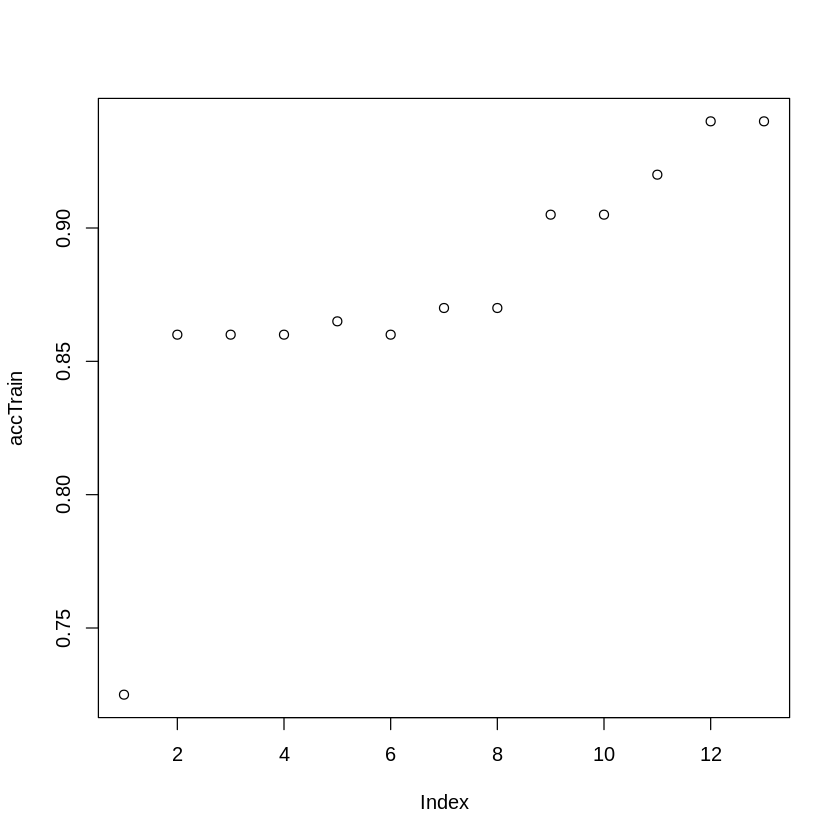

In [36]:
## pruning the tree to find the optimal configuration 
# complete tree
t = tree(high ~ ., train) 

accTrain = c()
accTest = c()
nleaf = 3:15
for (n in nleaf) {
  # pruning the complete tree (based on parameter "best")
    tPruned = prune.tree(t, best = n)
  # performance on training data
    predTrain = predict(tPruned, train, type = "class")
    accTrain[nleaf == n] = acc.class(predTrain, train$high)

  # performance on test data
    predTest = predict(tPruned, test, type = "class")
    accTest[nleaf == n] = acc.class(predTest, train$high)
}
# plot results
plot(accTrain)
lines(accTest)

Utiliza la función *cv.tree* para hacer una cross-validación 10-fold sobre el dataset de train. ¿A qué conclusión llegas?  
**Idea:** Busca en el objeto de salida que te devuelve *cv.tree* y dibuja el factor de desviación (medida que da idea del error de clasificación) en función del número de hojas del árbol.

In [39]:
# complete tree

# 10-fold cross-validated tree
cvt = cv.tree(t, K = 10)
# plot results

Una vez hemos encontrado la configuración óptima (número de hojas) de nuestro árbol, evalúa el accuracy del árbol obtenido por defecto y el del óptimo, tanto en train como en test. ¿Qué conclusión obtienes?

In [44]:
## performance in train

# default tree
    predTrain1 = predict(t, train, type = "class")
    accTrain1 = acc.class(predTrain1, train$high)
# optimum tree
    t2 = prune.tree(t, best = 6)
    predTrain2 = predict(t2, train, type = "class")
    accTrain2 = acc.class(predTrain2, train$high)
## performance in test
# default tree
    predTest1 = predict(t, test, type = "class")
    accTest1 = acc.class(predTest1, train$high)
# optimum tree
    predTest2 = predict(t2, test, type = "class")
    accTest2 = acc.class(predTest2, train$high)

## Results7
# Train
accTrain1
accTrain2
#Test
accTest1
accTest2


[1] 0.94

[1] 0.86

[1] 0.575

[1] 0.56

Dibuja el árbol por defecto y el óptimo para ver la diferencia en complejidad. 

In [10]:
# plot results


Hasta ahora hemos obtenido la configuración ótpima del árbol en función del número de hojas del mismo. La idea ahora es fijarnos en otro parámetro, la profundidad del árbol (ambos conceptos están relacionados). Para ello, aprende un conjunto de árboles de diferente profundidad (de 1 a 10 niveles) utilizando el dataset de train y evalúa su accuracy para clasificar en el test. Dibuja dicho accuracy en función de la profundidad del árbol. ¿Cuál sería la configuración óptima en este caso? Compara el accuracy obtenido para esta configuración con el que obteníamos en el ejercicio anterior.  
**Nota:** Usa la función *rpart* (parámetro *maxdepth*).

In [11]:
md = 1:10  # maximum depth
acc.test = c()

for (i in md) {
  
}


El paquete *caret* pemite evaluar de forma sencilla la idoneidad de varios parámetros de configuración del árbol considerando distintos tipos de cross-validación.  

**Ejercicio:** 

Utilizando la función *train* de *caret* (method *rpart2*), calcula el accuracy que se obtiene para 3 árboles de distinta profundidad (valores escogidos internamente por *caret*) bajo un esquema de cross-validación con 5 folds. Dibuja los resultados.  
**Preguntas:** ¿Cuál dirías que es la configuración óptima del árbol en este caso? ¿Los resultados son diferentes a lo que esperabas obtener? ¿A qué puede deberse?  
**Nota:** La siguiente página ofrece una documentación muy buena de *caret*: https://topepo.github.io/caret

In [12]:
# cross-validation with 5 folds
#trctrl = *** 

## caret automatically tries different values of the method's parameter: internal selection
#t = train(***)

En lugar de dejar que *caret* seleccione internamente los valores del parámetro a configurar (en este caso *maxdepth*), podemos especificárselos nosotr@s. Para ello hay que definir el *grid* que va a considerar *caret* (argumento *tuneGrid*).

**Preguntas:** Los resultados han cambiado, ¿por qué? ¿Qué pasa si ejecutas varias veces el bloque de código anterior?

**Ejercicio:** 

Para comprobar el efecto que tiene en nuestros resultados la elección de los subconjuntos de train y test, repite el ejercicio anterior 20 veces, salvando en cada iteración la profundidad del árbol óptimo (prueba valores entre 1 y 10).  
**Pregunta:** A la vista de los resultados, ¿dirías que es importante tener en cuneta el efecto de la partición train/validation durante el proceso de optimización del árbol?

In [13]:
## effect of train/test partition on optimum depth


**Ejercicio:** Una vez hemos definido una profundidad óptima para nuestro árbol, comprueba ahora cuál sería el efecto de la partición train/validation sobre el accuracy.  
**Idea:** Reutiliza el código anterior. Entre muchas otras cosas, la función *train* devuelve lo que estás buscando. Da una estimación (valor promedio +/- margen de incertidumbre) del accuracy.

In [14]:
## effect on accuracy of train/test partition


El ejercicio anterior puede hacerse en `caret` de forma mucho más sencilla simplemente con cambiar el modo en el que definimos la cross-validación.

**Ejercicio:** Revisa la documentación de la función *trainControl* y replica el ejercicio anterior.

In [15]:
## previous block with caret


Lógicamente, el número de folds considerados también puede tener un efecto en la búsqueda de la configuración óptima del árbol. 

**Ejercicio:** Comprueba cómo varía la profundidad óptima del árbol (posibles valores entre 1 y 10) al cambiar el número de folds (desde 3 hasta 10).

In [16]:
## effect of number of folds
